In [1]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import dshstexas
%matplotlib notebook

In [2]:
data_dir = "bin/data-2020-08-21"
deaths_file = "%s/TexasCOVID19DailyCountyFatalityCountData.xlsx" %data_dir
deaths_df = dshstexas.read(deaths_file)

# convert column date strings to datetime objects for 
# easier processing:
deaths_df.columns = [datetime.datetime.strptime(x, "%Y-%m-%d") for x in deaths_df.columns]

/home/jrangel/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1418: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


# Monthly new deaths:

In [3]:
# deaths data only extends to 2020-08-19:
start_date = datetime.datetime.now() - datetime.timedelta(days=21)
end_date = datetime.datetime.now()

deaths_data_dates = [x for x in deaths_df.columns if x > start_date and x < end_date]
monthly_deaths = deaths_df.loc[:, deaths_data_dates]
monthly_deaths

,2020-08-01,2020-08-02,2020-08-03,2020-08-04,2020-08-05,2020-08-06,2020-08-07,2020-08-08,2020-08-09,2020-08-10,2020-08-11,2020-08-12,2020-08-13,2020-08-14,2020-08-15,2020-08-16,2020-08-17,2020-08-18,2020-08-19
county,,,,,,,,,,,,,,,,,,,
Anderson,14.0,14.0,14.0,15.0,16.0,16.0,16.0,16.0,16.0,17.0,17.0,17.0,17.0,17.0,17.0,17.0,17.0,17.0,17.0
Andrews,6.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0
Angelina,50.0,51.0,51.0,51.0,52.0,54.0,55.0,55.0,55.0,55.0,55.0,55.0,55.0,55.0,55.0,55.0,55.0,55.0,55.0
Aransas,16.0,16.0,16.0,16.0,16.0,16.0,16.0,16.0,16.0,16.0,16.0,16.0,16.0,16.0,16.0,16.0,16.0,16.0,16.0
Archer,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wood,7.0,8.0,8.0,8.0,8.0,8.0,10.0,11.0,11.0,12.0,12.0,12.0,12.0,12.0,12.0,12.0,12.0,12.0,12.0
Yoakum,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
Young,5.0,5.0,5.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0


In [4]:
#difference over whole month:
days_so_far = monthly_deaths.shape[1]
monthly_deaths_growth = monthly_deaths.diff(axis=1, periods=days_so_far-1).dropna(axis=1, how="all")

# sort from largest to smallest change:
monthly_deaths_growth = monthly_deaths_growth.sort_values(
    by=monthly_deaths_growth.columns[-1], 
    ascending=False)
monthly_deaths_growth

,2020-08-19
county,
Harris,200.0
Hidalgo,142.0
Bexar,83.0
Dallas,77.0
Cameron,72.0
...,...
San Patricio,NaN
San Saba,NaN
Tom Green,NaN


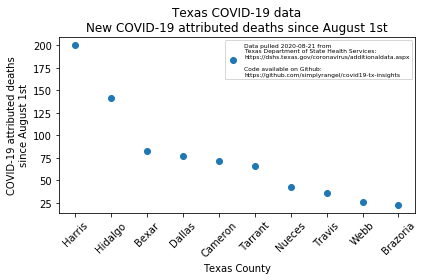

In [5]:
# plot:
plt.figure(figsize=(6,4))
plt.title("Texas COVID-19 data\nNew COVID-19 attributed deaths since August 1st")
label="""Data pulled 2020-08-21 from
Texas Department of State Health Services:
https://dshs.texas.gov/coronavirus/additionaldata.aspx

Code available on Github:
https://github.com/simplyrangel/covid19-tx-insights"""
plt.scatter(monthly_deaths_growth.index[:10], monthly_deaths_growth.iloc[:10,:], label=label)
plt.xticks(monthly_deaths_growth.index[:10], rotation=45)
plt.xlabel("Texas County")
plt.ylabel("COVID-19 attributed deaths\nsince August 1st")
plt.legend(fontsize=6)
plt.tight_layout()

# save figure:
plt.savefig("bin/august-deaths-as-of-2020-08-21.png", dpi=200)

## Which counties did not record deaths so far in August?

In [12]:
no_august_deaths = monthly_deaths_growth[monthly_deaths_growth == 0].dropna()
no_august_deaths.shape

(102, 1)